<a href="https://colab.research.google.com/github/Joytirmoy-Halder/Learning/blob/main/ThesisG49_AIUB_Joyti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load the data from the CSV file
#load the data
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('Questionnaire 0.1.3.csv')

Saving Questionnaire 0.1.3.csv to Questionnaire 0.1.3.csv


## Initial Data Exploration

In [ ]:
print("First 5 rows of the DataFrame:")
print(data.head())

print("\nDataFrame Info:")
data.info()

print("\nDescriptive Statistics:")
print(data.describe())

print("\nMissing values per column:")
print(data.isnull().sum())

First 5 rows of the DataFrame:
             Timestamp                       Name Gender  \
0   11/29/2025 3:17:24                       Aban   Male   
1  11/22/2025 23:00:40                     Abdul    Male   
2  11/22/2025 23:00:40                Abdul Hamid   Male   
3  11/21/2025 18:12:35  Abdullah Adnan Abul Kalam   Male   
4   11/9/2025 16:13:21              Abdullah Mahi   Male   

                                     Department Name Current semester  \
0                                              Civil              6th   
1  B.Sc. in Electronic & Telecommunication Engine...              9th   
2  B.Sc. in Electronic & Telecommunication Engine...              9th   
3                                                CSE              8th   
4                                                CSE              8th   

        CGPA       Source of expenses Father's Profession Mother's Profession  \
0  3.50-4.00                   Family             Service             Service   
1  3.00

## Define Target Variable


In [ ]:
target_column = 'Have you ever considered seeking treatment for stress, anxiety, or depression from a doctor, psychologist, or counsellor?'
data['target_variable'] = data[target_column].map({'Yes': 1, 'No': 0})
print("Target variable created and mapped. First 5 rows of the target variable column:")
print(data[['target_variable', target_column]].head())

Target variable created and mapped. First 5 rows of the target variable column:
   target_variable  \
0                1   
1                1   
2                1   
3                1   
4                0   

  Have you ever considered seeking treatment for stress, anxiety, or depression from a doctor, psychologist, or counsellor?  
0                                                Yes                                                                         
1                                                Yes                                                                         
2                                                Yes                                                                         
3                                                Yes                                                                         
4                                                 No                                                                         


## Feature Preprocessing


In [ ]:
columns_to_drop = ['Timestamp', 'Name', 'Have you ever considered seeking treatment for stress, anxiety, or depression from a doctor, psychologist, or counsellor?']
data = data.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}")
print("Remaining columns:")
print(data.columns.tolist())

Dropped columns: ['Timestamp', 'Name', 'Have you ever considered seeking treatment for stress, anxiety, or depression from a doctor, psychologist, or counsellor?']
Remaining columns:
['Gender', 'Department Name', 'Current semester', 'CGPA', 'Source of expenses', "Father's Profession", "Mother's Profession", 'Family-monthly income', 'Violence in family', 'Mourning/Bereavement', 'Do you feel you maintain a balanced diet?', 'Do you engage in physical exercise regularly?', 'Do you consume caffeine (tea/coffee/energy drinks) daily?', 'Do you smoke or consume alcohol?', 'Do you often skip meals because of a busy schedule?', 'Do you usually get at least 7 hours of sleep at night?', 'Do you drink at least 6–8 glasses of water daily?', 'Do you spend more than 6 hours sitting daily (screen time, studying, etc.)?', 'Do you participate in social or recreational activities outside academics/work?', 'Little interest or pleasure in doing things.', 'Feeling down, depressed, or hopeless.', 'Trouble fal

In [ ]:
data['CGPA'] = data['CGPA'].replace('Prefer not to share', np.nan)

def convert_cgpa_range_to_midpoint(cgpa_range):
    if pd.isna(cgpa_range):
        return np.nan
    parts = str(cgpa_range).replace(',', '.').split('-')
    if len(parts) == 2:
        try:
            lower_bound = float(parts[0].strip())
            upper_bound = float(parts[1].strip())
            return (lower_bound + upper_bound) / 2
        except ValueError:
            return np.nan
    try:
        return float(cgpa_range)
    except ValueError:
        return np.nan

data['CGPA'] = data['CGPA'].apply(convert_cgpa_range_to_midpoint)
data['CGPA'] = data['CGPA'].fillna(data['CGPA'].median())

print("CGPA column preprocessed. First 5 rows:")
print(data['CGPA'].head())
print(f"CGPA unique values after preprocessing: {data['CGPA'].unique()}")

CGPA column preprocessed. First 5 rows:
0    3.750
1    3.245
2    3.245
3    3.245
4    3.750
Name: CGPA, dtype: float64
CGPA unique values after preprocessing: [3.75  3.245 2.87 ]


In [ ]:
data['Current semester'] = data['Current semester'].str.replace(r'\D', '', regex=True)
data['Current semester'] = pd.to_numeric(data['Current semester'], errors='coerce')
data['Current semester'] = data['Current semester'].fillna(data['Current semester'].median()).astype(int)
print("Current semester column preprocessed. First 5 rows:")
print(data['Current semester'].head())
print(f"Current semester unique values after preprocessing: {data['Current semester'].unique()}")

Current semester column preprocessed. First 5 rows:
0    6
1    9
2    9
3    8
4    8
Name: Current semester, dtype: int64
Current semester unique values after preprocessing: [ 6  9  8 12 11  5  7 10  4  3  2 14  1]


In [ ]:
binary_cols = []
for col in data.select_dtypes(include='object').columns:
    unique_vals = data[col].unique()
    if set(unique_vals).issubset({'Yes', 'No'}):
        binary_cols.append(col)

encoder = LabelEncoder()
for col in binary_cols:
    data[col] = encoder.fit_transform(data[col])

print(f"Binary categorical columns encoded: {binary_cols}")
print("First 5 rows of encoded binary columns:")
print(data[binary_cols].head())

Binary categorical columns encoded: ['Violence in family', 'Mourning/Bereavement', 'Do you feel you maintain a balanced diet?', 'Do you engage in physical exercise regularly?', 'Do you consume caffeine (tea/coffee/energy drinks) daily?', 'Do you smoke or consume alcohol?', 'Do you often skip meals because of a busy schedule?', 'Do you usually get at least 7 hours of sleep at night?', 'Do you drink at least 6–8 glasses of water daily?', 'Do you spend more than 6 hours sitting daily (screen time, studying, etc.)?', 'Do you participate in social or recreational activities outside academics/work?', 'Do you frequently feel that the workload associated with exams or studying is too much for you?', "When you're under stress, do you feel supported by your friends or classmates?", 'Do you feel at ease talking to family members about your stress or mental health concerns?', 'Do you put off seeking mental health treatment from a doctor or counsellor because of social stigma or fear of what others

##

In [ ]:
non_binary_object_cols = [col for col in data.select_dtypes(include='object').columns if col not in binary_cols]
data = pd.get_dummies(data, columns=non_binary_object_cols, drop_first=True)

print(f"Non-binary categorical columns one-hot encoded: {non_binary_object_cols}")
print("First 5 rows of the DataFrame after one-hot encoding:")
print(data.head())

Non-binary categorical columns one-hot encoded: ['Gender', 'Department Name', 'Source of expenses', "Father's Profession", "Mother's Profession", 'Family-monthly income']
First 5 rows of the DataFrame after one-hot encoding:
   Current semester   CGPA  Violence in family  Mourning/Bereavement  \
0                 6  3.750                   1                     1   
1                 9  3.245                   1                     1   
2                 9  3.245                   1                     1   
3                 8  3.245                   0                     1   
4                 8  3.750                   0                     0   

   Do you feel you maintain a balanced diet?  \
0                                          1   
1                                          0   
2                                          0   
3                                          0   
4                                          1   

   Do you engage in physical exercise regularly?  \
0

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude the target variable from scaling
if 'target_variable' in numerical_cols:
    numerical_cols.remove('target_variable')

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(f"Numerical columns scaled: {numerical_cols}")
print("First 5 rows of the DataFrame after numerical scaling:")
print(data[numerical_cols].head())


Numerical columns scaled: ['Current semester', 'CGPA', 'Violence in family', 'Mourning/Bereavement', 'Do you feel you maintain a balanced diet?', 'Do you engage in physical exercise regularly?', 'Do you consume caffeine (tea/coffee/energy drinks) daily?', 'Do you smoke or consume alcohol?', 'Do you often skip meals because of a busy schedule?', 'Do you usually get at least 7 hours of sleep at night?', 'Do you drink at least 6–8 glasses of water daily?', 'Do you spend more than 6 hours sitting daily (screen time, studying, etc.)?', 'Do you participate in social or recreational activities outside academics/work?', 'Little interest or pleasure in doing things.', 'Feeling down, depressed, or hopeless.', 'Trouble falling or staying asleep, or sleeping too much.', 'Feeling tired or having little energy.', 'Poor appetite or overeating.', 'Feeling nervous, anxious, or on edge.', 'Not being able to stop or control worrying.', 'Trouble relaxing.', 'Becoming easily annoyed or irritable.', 'Troubl

## Split Data

In [ ]:
X = data.drop('target_variable', axis=1)
y = data['target_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (372, 98)
Shape of X_test: (94, 98)
Shape of y_train: (372,)
Shape of y_test: (94,)


## Install and Import XGBoost


In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
print("XGBClassifier imported successfully.")

XGBClassifier imported successfully.


In [ ]:
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classifier trained and predictions made.")

XGBoost Classifier trained and predictions made.


Untuned XGBoost Classifier trained and predictions made.

Classification Report - Untuned XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        53
           1       1.00      0.80      0.89        41

    accuracy                           0.91        94
   macro avg       0.93      0.90      0.91        94
weighted avg       0.93      0.91      0.91        94



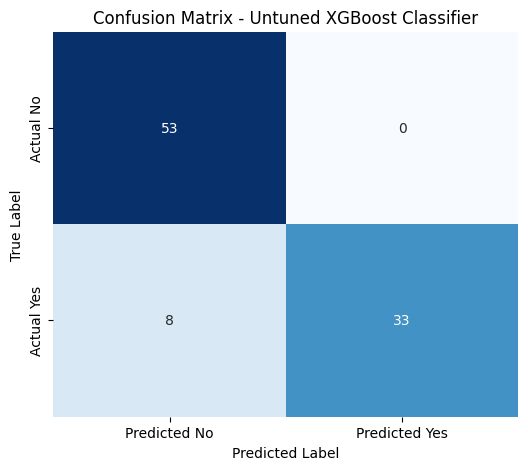

Confusion matrix for Untuned XGBoost Classifier displayed.


In [ ]:
xgb_untuned = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_untuned.fit(X_train, y_train)
y_pred_untuned_xgb = xgb_untuned.predict(X_test)

print("Untuned XGBoost Classifier trained and predictions made.")

print("\nClassification Report - Untuned XGBoost Classifier:")
print(classification_report(y_test, y_pred_untuned_xgb))

cm_untuned_xgb = confusion_matrix(y_test, y_pred_untuned_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_untuned_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Untuned XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix for Untuned XGBoost Classifier displayed.")

## Train and Evaluate Logistic Regression

In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression model trained and predictions made.")

Logistic Regression model trained and predictions made.



Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        53
           1       0.90      0.68      0.78        41

    accuracy                           0.83        94
   macro avg       0.85      0.81      0.82        94
weighted avg       0.84      0.83      0.83        94



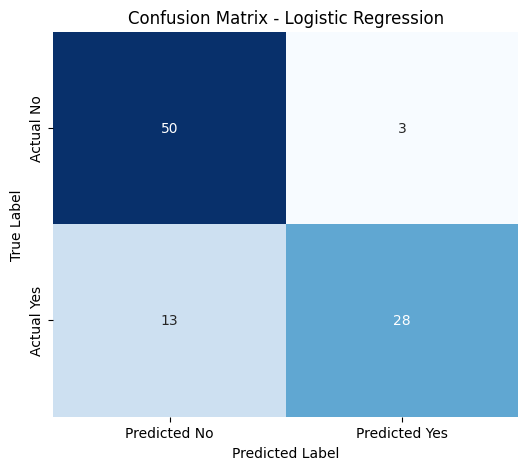

Confusion matrix for Logistic Regression displayed.


In [ ]:
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix for Logistic Regression displayed.")

## Train and Evaluate Naive Bayes


In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Gaussian Naive Bayes model trained and predictions made.")

Gaussian Naive Bayes model trained and predictions made.



Classification Report - Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.19      0.32        53
           1       0.49      1.00      0.66        41

    accuracy                           0.54        94
   macro avg       0.74      0.59      0.49        94
weighted avg       0.78      0.54      0.47        94



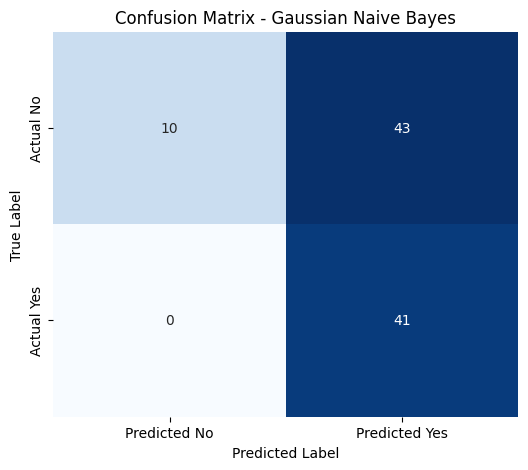

Confusion matrix for Gaussian Naive Bayes displayed.


In [ ]:
print("\nClassification Report - Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix for Gaussian Naive Bayes displayed.")

## Train and Evaluate Decision Tree


In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree model trained and predictions made.")

Decision Tree model trained and predictions made.



Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.88      0.85      0.86        41

    accuracy                           0.88        94
   macro avg       0.88      0.88      0.88        94
weighted avg       0.88      0.88      0.88        94



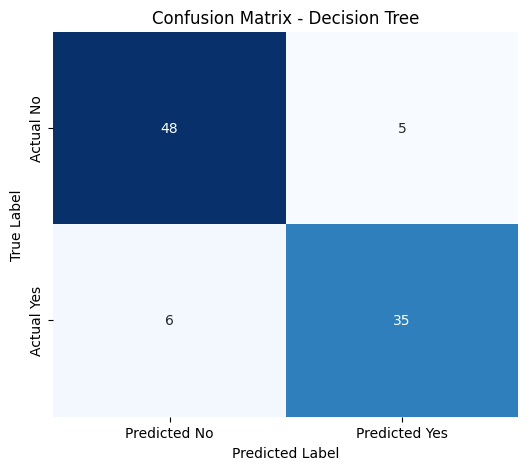

Confusion matrix for Decision Tree displayed.


In [ ]:
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix for Decision Tree displayed.")

**Reasoning**:
To train the Random Forest Classifier, I will instantiate the model with the specified `random_state`, fit it to the training data, and then make predictions on the test set.



In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier trained and predictions made.")

Random Forest Classifier trained and predictions made.


**Reasoning**:
Now that the Random Forest Classifier has been trained and predictions made, I will evaluate its performance by printing the classification report, computing the confusion matrix, and then visualizing the confusion matrix using a heatmap.




Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        53
           1       1.00      0.80      0.89        41

    accuracy                           0.91        94
   macro avg       0.93      0.90      0.91        94
weighted avg       0.93      0.91      0.91        94



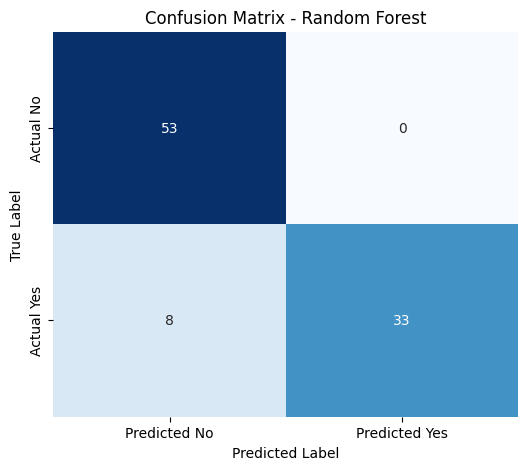

Confusion matrix for Random Forest displayed.


In [ ]:
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix for Random Forest displayed.")

##Support Vector Classifier

In [ ]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("Support Vector Classifier trained and predictions made.")

Support Vector Classifier trained and predictions made.



Classification Report - Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        53
           1       0.93      0.66      0.77        41

    accuracy                           0.83        94
   macro avg       0.86      0.81      0.82        94
weighted avg       0.85      0.83      0.82        94



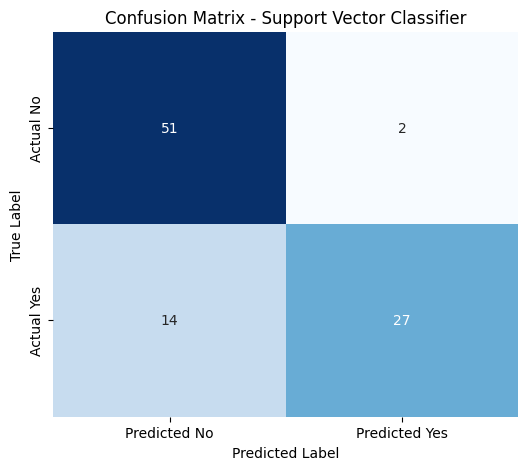

Confusion matrix for Support Vector Classifier displayed.


In [ ]:
print("\nClassification Report - Support Vector Classifier:")
print(classification_report(y_test, y_pred_svc))

cm_svc = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Support Vector Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix for Support Vector Classifier displayed.")

## Train and Evaluate K-Nearest Neighbors



In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("K-Nearest Neighbors model trained and predictions made.")

K-Nearest Neighbors model trained and predictions made.



Classification Report - K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.69      0.81      0.75        53
           1       0.69      0.54      0.60        41

    accuracy                           0.69        94
   macro avg       0.69      0.67      0.68        94
weighted avg       0.69      0.69      0.68        94



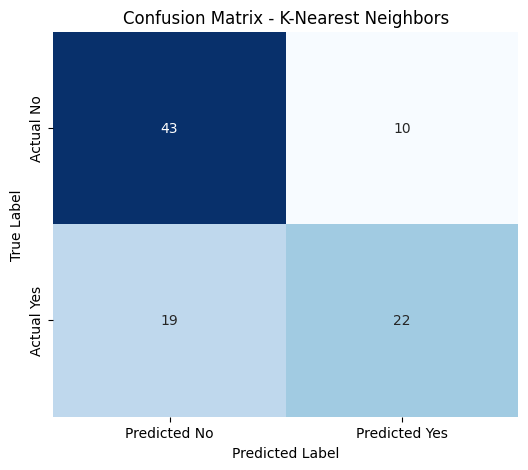

Confusion matrix for K-Nearest Neighbors displayed.


In [ ]:
print("\nClassification Report - K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix for K-Nearest Neighbors displayed.")

## Compare Model Performance


## Compare Model Performance

Performance metrics collected for all models, including untuned and tuned XGBoost.

Model Performance Comparison:
                       Model  Accuracy  Precision    Recall  F1-Score
0        Logistic Regression  0.829787   0.848438  0.813162  0.819923
1                Naive Bayes  0.542553   0.744048  0.594340  0.486730
2              Decision Tree  0.882979   0.881944  0.879659  0.880697
3              Random Forest  0.914894   0.934426  0.902439  0.910858
4  Support Vector Classifier  0.829787   0.857825  0.810400  0.817918
5        K-Nearest Neighbors  0.691489   0.690524  0.673953  0.675283
6            Untuned XGBoost  0.914894   0.934426  0.902439  0.910858
7              Tuned XGBoost  0.936170   0.949153  0.926829  0.933741


/tmp/ipython-input-1884953909.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=performance_df.sort_values(by=metric, ascending=False), palette='viridis')


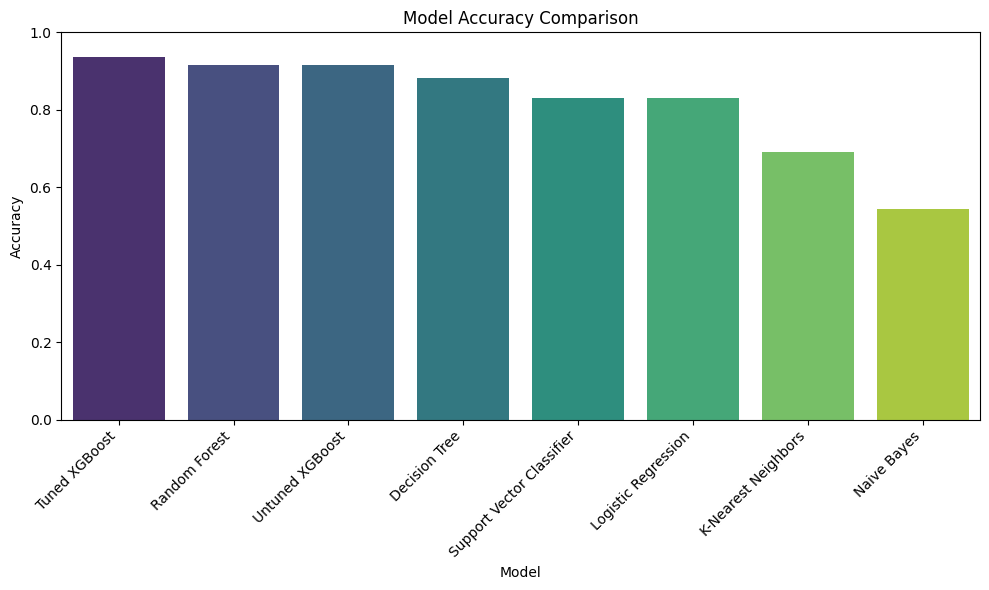

/tmp/ipython-input-1884953909.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=performance_df.sort_values(by=metric, ascending=False), palette='viridis')


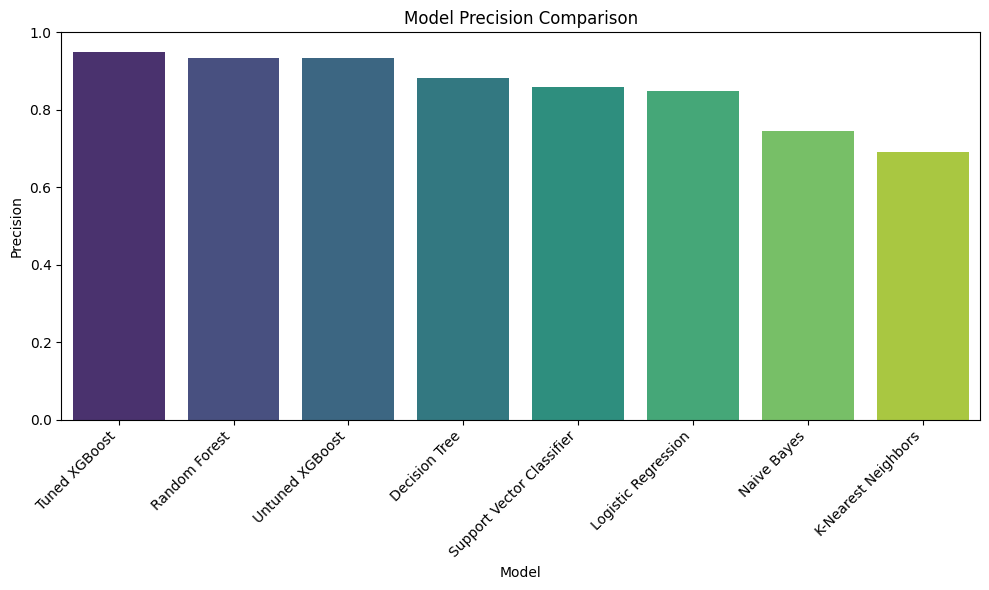

/tmp/ipython-input-1884953909.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=performance_df.sort_values(by=metric, ascending=False), palette='viridis')


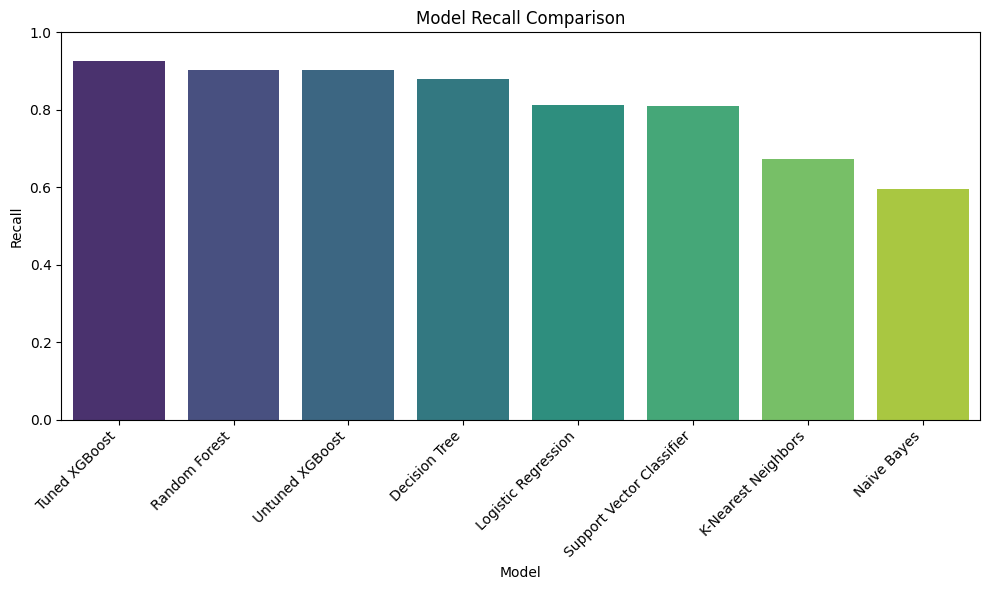

/tmp/ipython-input-1884953909.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=performance_df.sort_values(by=metric, ascending=False), palette='viridis')


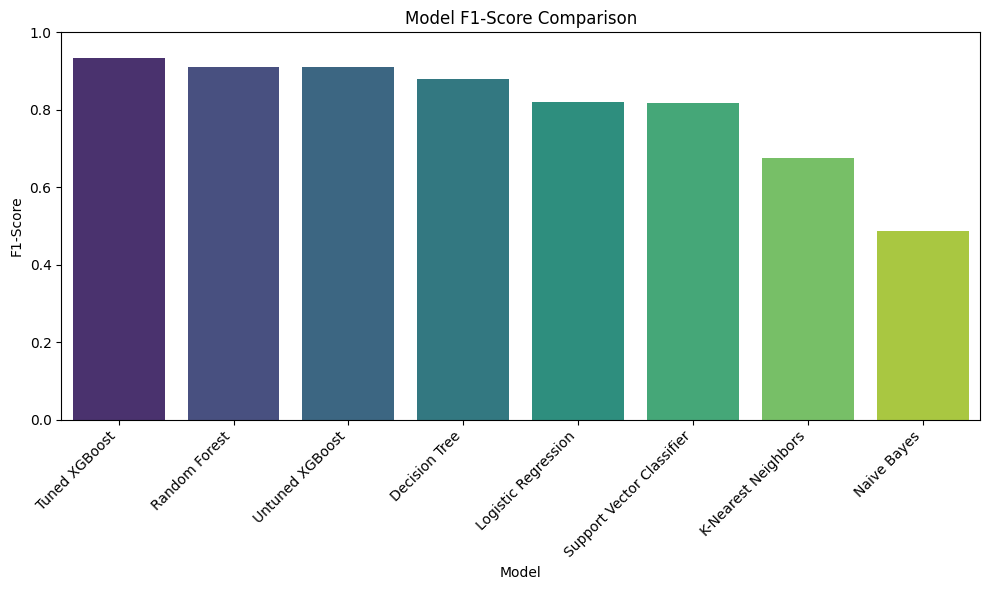

Separate bar charts for Accuracy, Precision, Recall, and F1-Score displayed.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported for DataFrame creation

# Train and predict for Logistic Regression (from cell 56c2501f)
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Train and predict for Naive Bayes (from cell a51d258d)
b_model = GaussianNB()
b_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Train and predict for Decision Tree (from cell 5bc361f8)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train and predict for Random Forest (from cell acd0829d)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train and predict for Support Vector Classifier (from cell 7ea7fca5)
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# Train and predict for K-Nearest Neighbors (from cell cc7b3905)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Retrain Untuned XGBoost (from cell 391533bf to ensure y_pred_untuned_xgb is fresh)
xgb_untuned = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_untuned.fit(X_train, y_train)
y_pred_untuned_xgb = xgb_untuned.predict(X_test)

# Retrain Tuned XGBoost (from cell e782cedc to ensure y_pred_tuned_xgb is fresh)
# Assuming best_params and grid_search_xgb are defined from cell 784141bb
# If grid_search_xgb.best_params_ is not available, you would need to re-run GridSearchCV or manually define best_params.
# The best_params from the previous run were {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
best_params = {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
xgb_tuned = XGBClassifier(random_state=42, eval_metric='logloss', **best_params)
xgb_tuned.fit(X_train, y_train)
y_pred_tuned_xgb = xgb_tuned.predict(X_test)


# Define model predictions dictionary with all predicted values
model_predictions = {
    'Logistic Regression': y_pred_lr,
    'Naive Bayes': y_pred_nb,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'Support Vector Classifier': y_pred_svc,
    'K-Nearest Neighbors': y_pred_knn,
    'Untuned XGBoost': y_pred_untuned_xgb,
    'Tuned XGBoost': y_pred_tuned_xgb
}

performance_metrics = []

for name, y_pred in model_predictions.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    performance_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    })

print("Performance metrics collected for all models, including untuned and tuned XGBoost.")

# Create DataFrame and display it (from cells 9b3754f6 and 3538ecf4)
performance_df = pd.DataFrame(performance_metrics)
print("\nModel Performance Comparison:")
print(performance_df)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Generate separate plots for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=performance_df.sort_values(by=metric, ascending=False), palette='viridis')
    plt.title(f'Model {metric} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1) # Set y-axis limit for metrics between 0 and 1
    plt.tight_layout()
    plt.show()

print("Separate bar charts for Accuracy, Precision, Recall, and F1-Score displayed.")

## Generate Correlation Heatmap


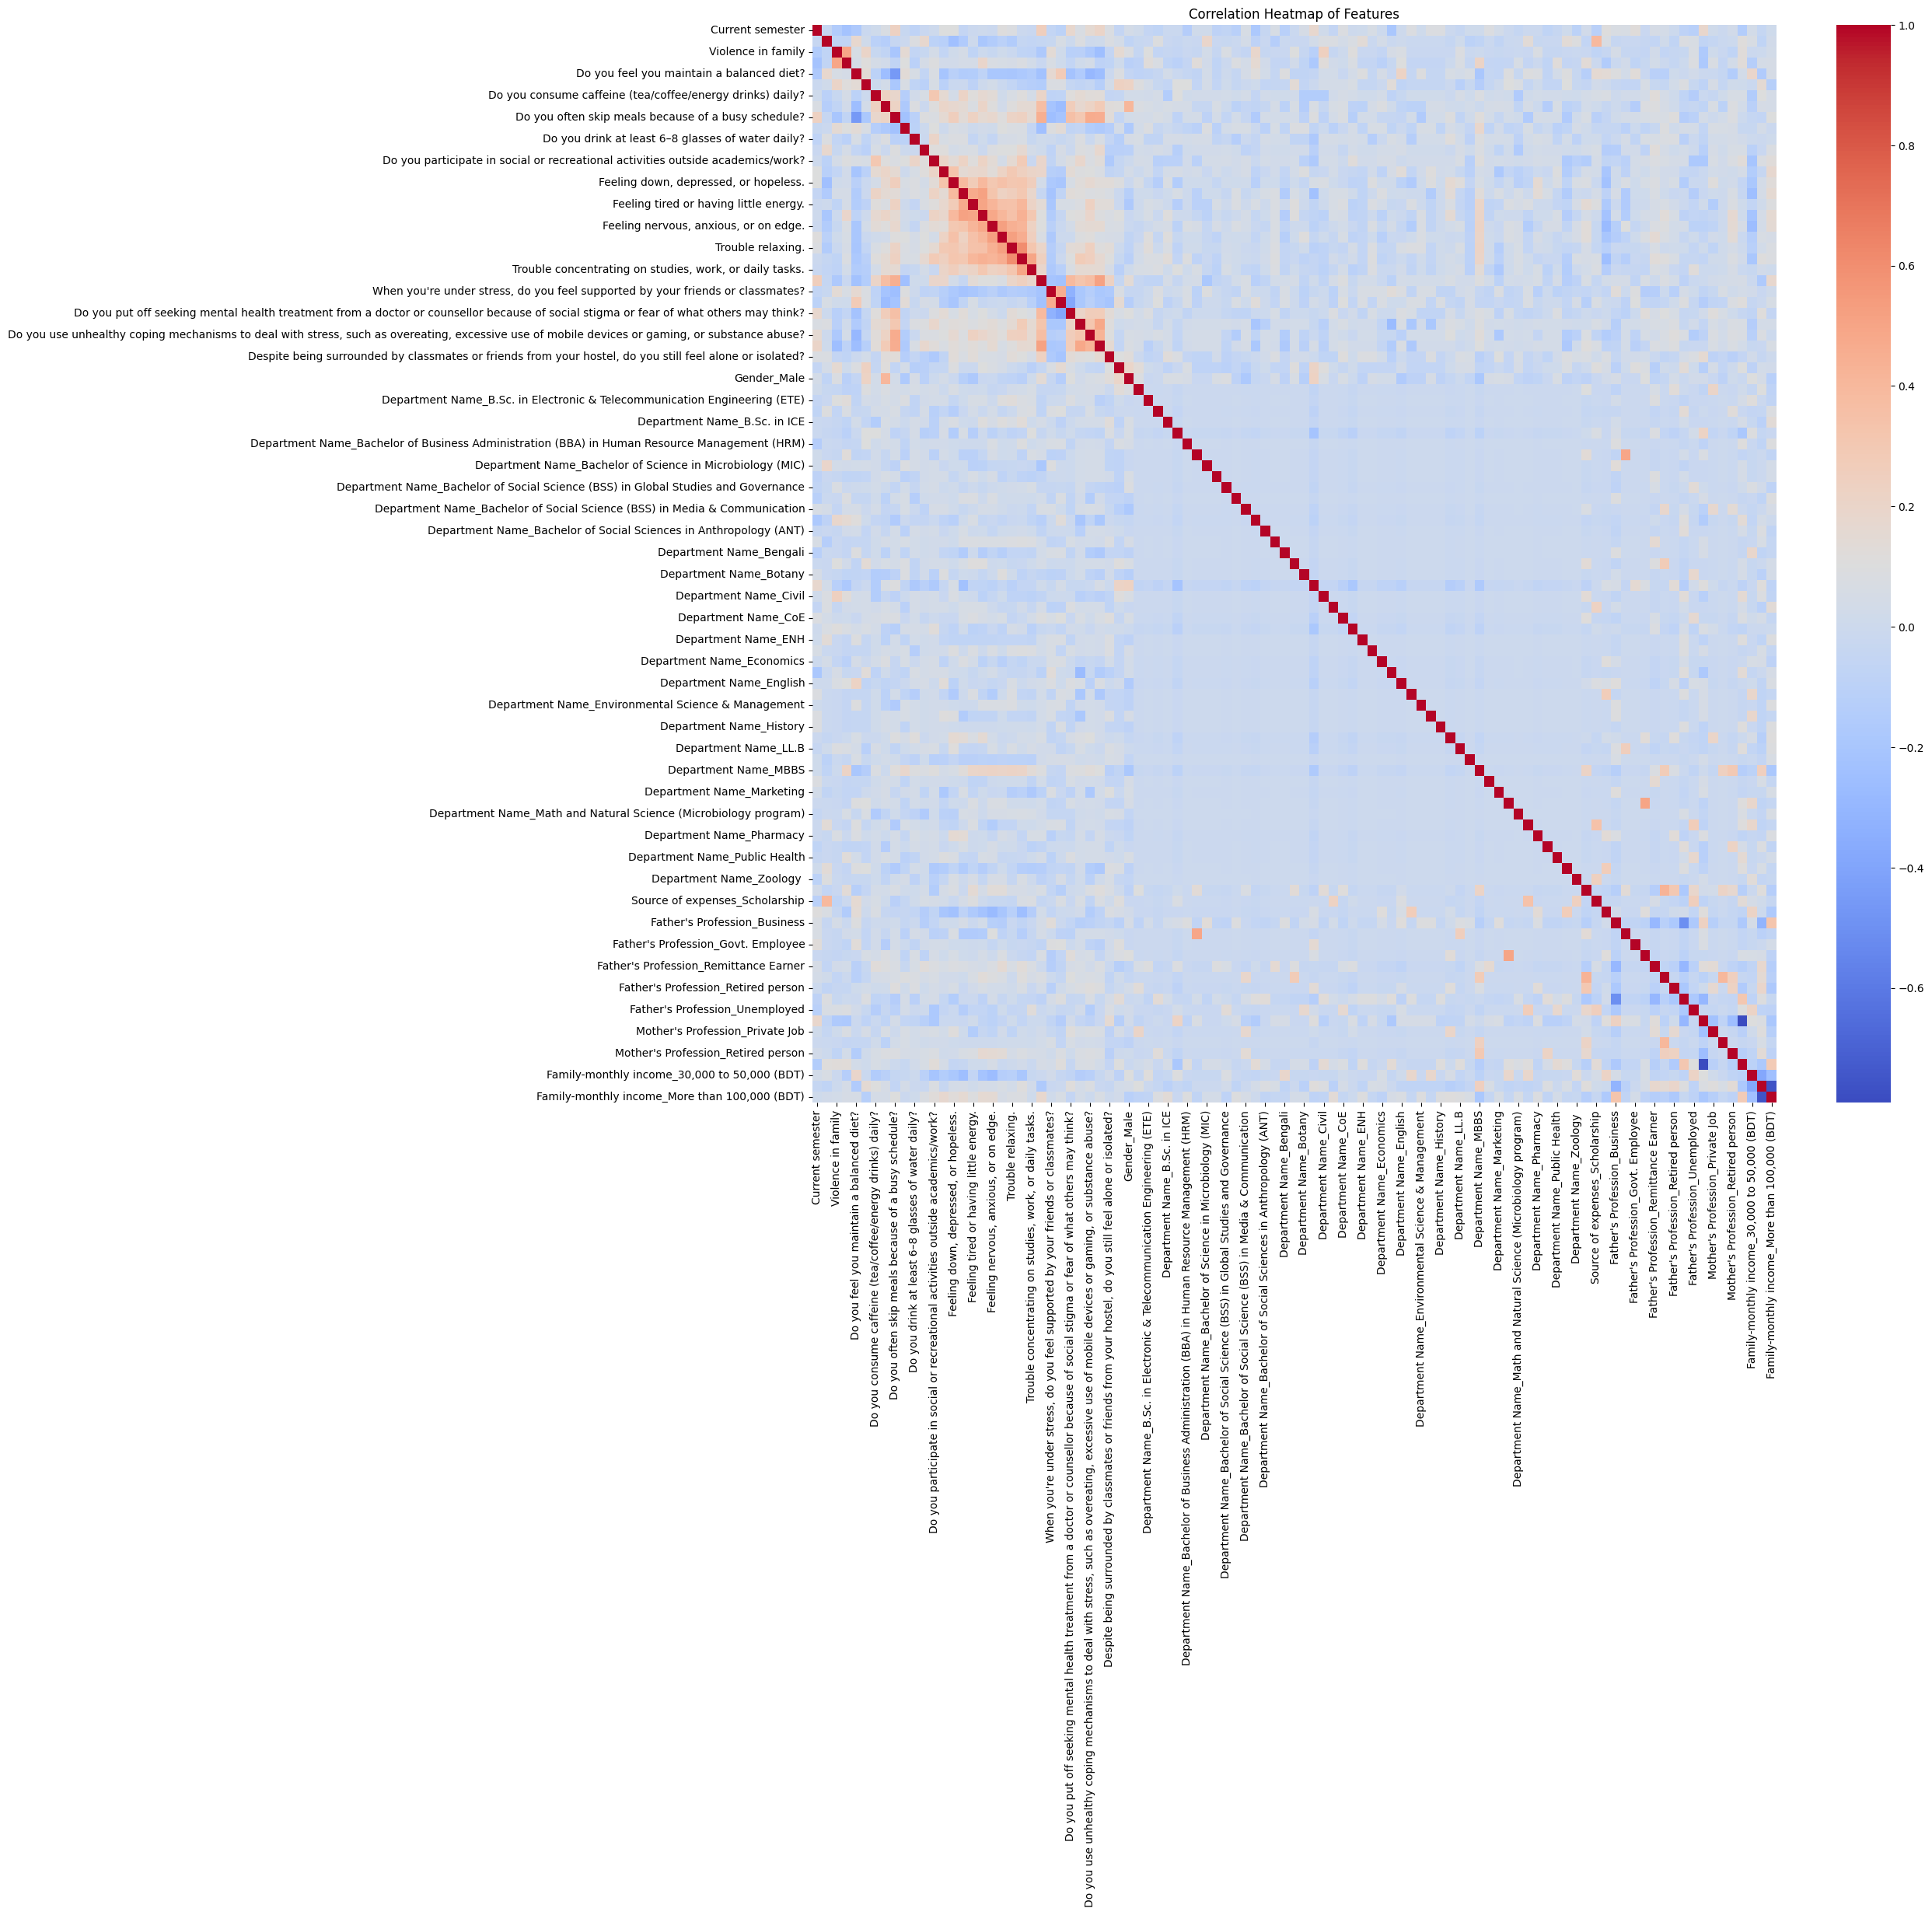

Correlation heatmap displayed.


In [ ]:
plt.figure(figsize=(20, 18))
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

print("Correlation heatmap displayed.")

##Pair Plots

Generating pair plot for 18 selected features and the target variable.


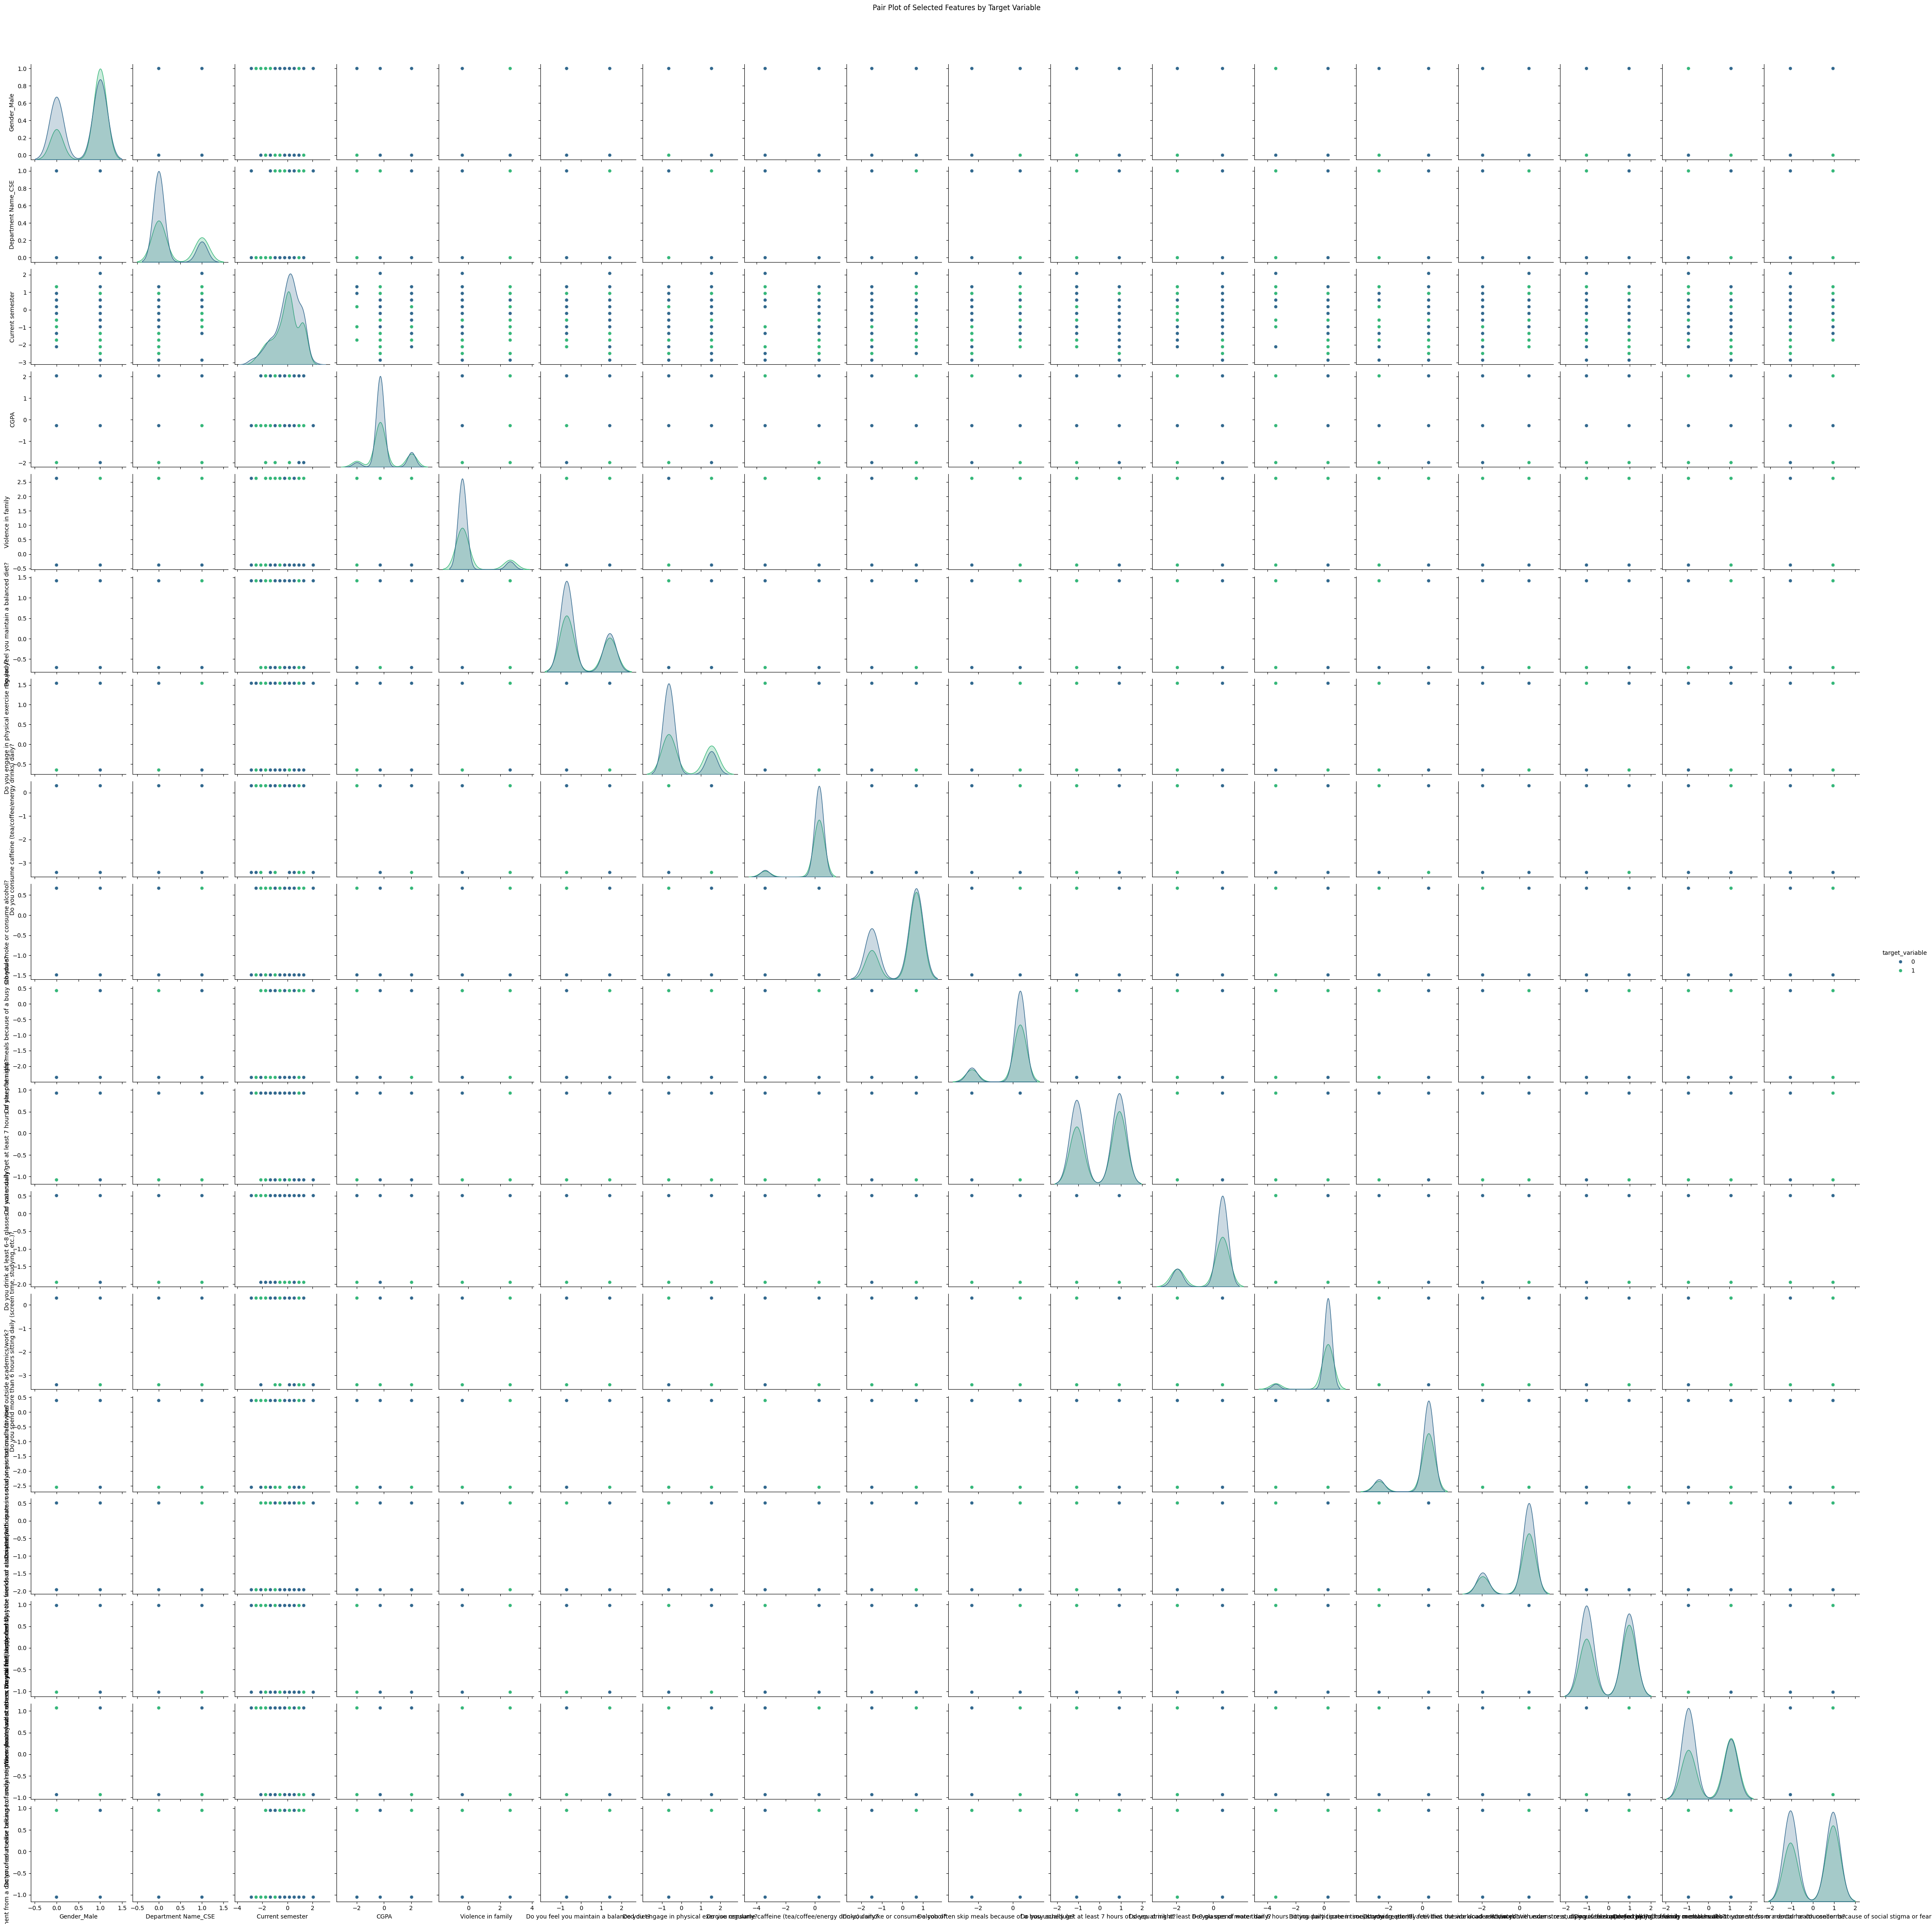

Pair plot generated for the specified columns.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map user-friendly names to actual DataFrame column names
# For one-hot encoded columns, selecting a representative one.
selected_columns_map = {
    'Gender': 'Gender_Male',
    'Departed name': 'Department Name_CSE', # Using CSE as a representative department
    'Current semester': 'Current semester',
    'Cgpa': 'CGPA',
    'Souce of expense': 'Source of expenses_Family', # Using Family as a representative source
    'violence': 'Violence in family',
    'Mourning/Bereavement': 'Mourning/Bereavement ',
    'balance dite': 'Do you feel you maintain a balanced diet?',
    'exercise': 'Do you engage in physical exercise regularly?',
    'consume caffeine': 'Do you consume caffeine (tea/coffee/energy drinks) daily?',
    'consume alcohol': 'Do you smoke or consume alcohol?',
    'skip meals': 'Do you often skip meals because of a busy schedule?',
    'hours of sleep': 'Do you usually get at least 7 hours of sleep at night?',
    'drinking water': 'Do you drink at least 6–8 glasses of water daily?',
    'screen time,studying,': 'Do you spend more than 6 hours sitting daily (screen time, studying, etc.)?',
    'recreational activities outside': 'Do you participate in social or recreational activities outside academics/work?',
    'workload associated with exam or studying': 'Do you frequently feel that the workload associated with exams or studying is too much for you?',
    'supported by your friends or classmate.': "When you're under stress, do you feel supported by your friends or classmates?",
    'talking to family members about your stress or mental health': 'Do you feel at ease talking to family members about your stress or mental health concerns?',
    'mental health treatment from a doctor or counsellor because of social stigma or fear of what others may think.': 'Do you put off seeking mental health treatment from a doctor or counsellor because of social stigma or fear of what others may think?'
}

# Filter for columns that actually exist in the DataFrame
columns_for_pair_plot = [col_name for desc, col_name in selected_columns_map.items() if col_name in data.columns]

# Add the target variable
columns_for_pair_plot.append('target_variable')

# Check if there are enough columns to plot
if len(columns_for_pair_plot) > 1:
    print(f"Generating pair plot for {len(columns_for_pair_plot) - 1} selected features and the target variable.")
    g = sns.pairplot(data[columns_for_pair_plot], hue='target_variable', diag_kind='kde', palette='viridis')
    g.fig.suptitle('Pair Plot of Selected Features by Target Variable', y=1.02) # Adjust suptitle position
    plt.show()
    print("Pair plot generated for the specified columns.")
else:
    print("No valid columns found from your request to generate a pair plot.")

Generating pair plot with shortened column names.


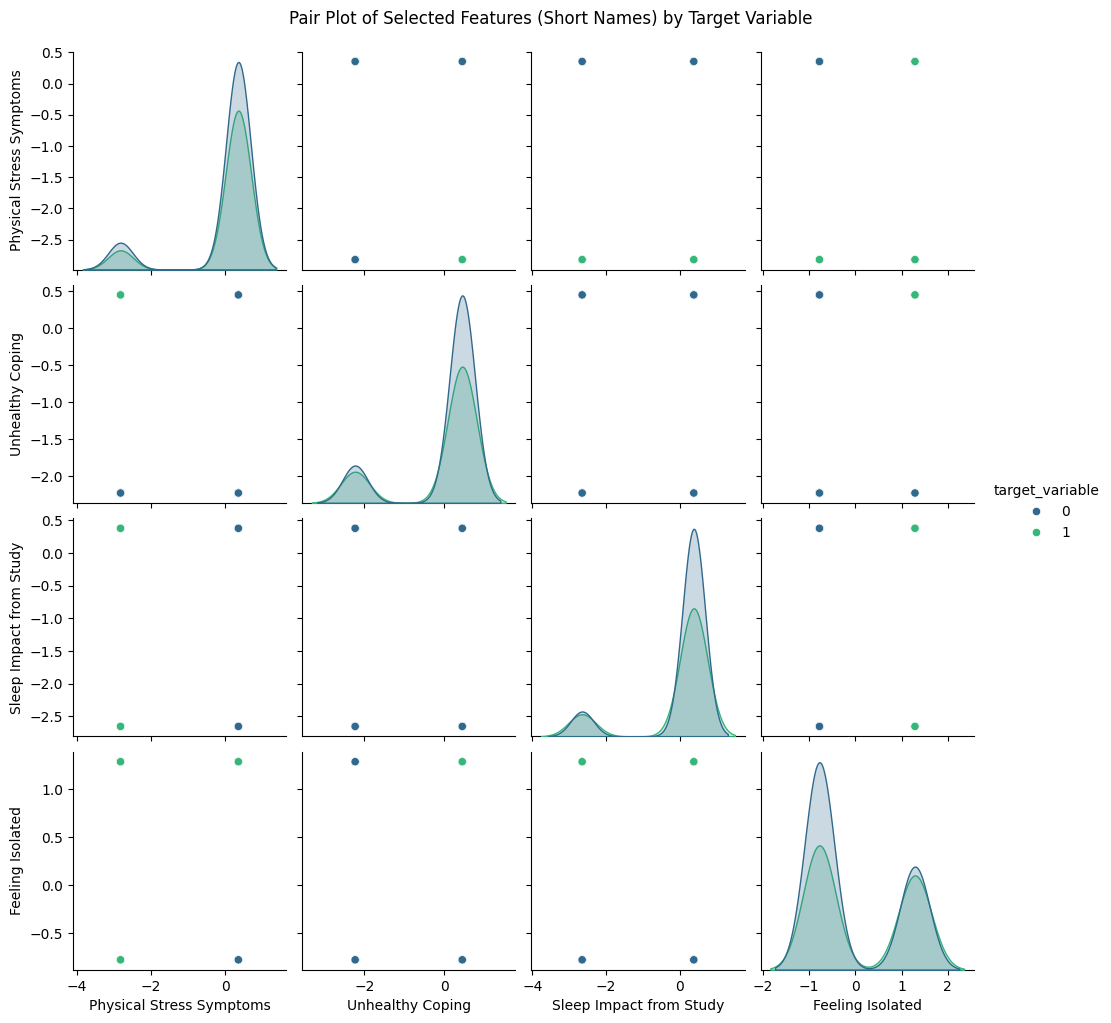

Pair plot generated with shortened column names for better readability.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Original long column names
long_names = [
    'Do you experience physical symptoms of stress, such as headaches, upset stomachs, or rapid heartbeats?',
    'Do you use unhealthy coping mechanisms to deal with stress, such as overeating, excessive use of mobile devices or gaming, or substance abuse?',
    'Do study pressures or exam deadlines impact your sleep habits, causing you to sleep insufficiently or late?',
    'Despite being surrounded by classmates or friends from your hostel, do you still feel alone or isolated?' # Corrected: added '?'
]

# Shortened names for the plot
short_names = [
    'Physical Stress Symptoms',
    'Unhealthy Coping',
    'Sleep Impact from Study',
    'Feeling Isolated'
]

# Create a temporary DataFrame with shortened names and the target variable
plot_df = data[long_names + ['target_variable']].copy()
plot_df.columns = short_names + ['target_variable']

print("Generating pair plot with shortened column names.")

# Generate the pair plot with shortened names
g = sns.pairplot(plot_df, hue='target_variable', diag_kind='kde', palette='viridis')
g.fig.suptitle('Pair Plot of Selected Features (Short Names) by Target Variable', y=1.02)
plt.show()

print("Pair plot generated with shortened column names for better readability.")

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

print("Hyperparameter search space for XGBoost Classifier defined:")
print(param_grid_xgb)

Hyperparameter search space for XGBoost Classifier defined:
{'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.7, 0.9], 'colsample_bytree': [0.7, 0.9]}


## Perform GridSearchCV for Hyperparameter Tuning

### Subtask:
Use GridSearchCV with 5-fold cross-validation to search for the best combination of hyperparameters for the XGBoost Classifier on the training data, optimizing for accuracy.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize an XGBClassifier model
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Create a GridSearchCV object
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train, y_train)

print("GridSearchCV completed.")
print("Best parameters found: ", grid_search_xgb.best_params_)
print("Best cross-validation accuracy: ", grid_search_xgb.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
GridSearchCV completed.
Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
Best cross-validation accuracy:  0.8951711711711712


## Retrain XGBoost with Best Parameters

Initialize a new XGBoost Classifier with the best hyperparameters found by `GridSearchCV` and train this model on the full training dataset (`X_train`, `y_train`).


In [ ]:
best_params = grid_search_xgb.best_params_
xgb_tuned = XGBClassifier(random_state=42, eval_metric='logloss', **best_params)
xgb_tuned.fit(X_train, y_train)

print("Tuned XGBoost Classifier initialized and trained with best hyperparameters.")
print(f"Best hyperparameters used: {best_params}")

Tuned XGBoost Classifier initialized and trained with best hyperparameters.
Best hyperparameters used: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}


## Evaluate Tuned XGBoost Model


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.829787,0.848438,0.813162,0.819923
1,Naive Bayes,0.542553,0.744048,0.594340,0.486730
2,Decision Tree,0.882979,0.881944,0.879659,0.880697
3,Random Forest,0.914894,0.934426,0.902439,0.910858
4,Support Vector Classifier,0.829787,0.857825,0.810400,0.817918
5,K-Nearest Neighbors,0.691489,0.690524,0.673953,0.675283
6,Untuned XGBoost,0.914894,0.934426,0.902439,0.910858
7,Tuned XGBoost,0.936170,0.949153,0.926829,0.933741


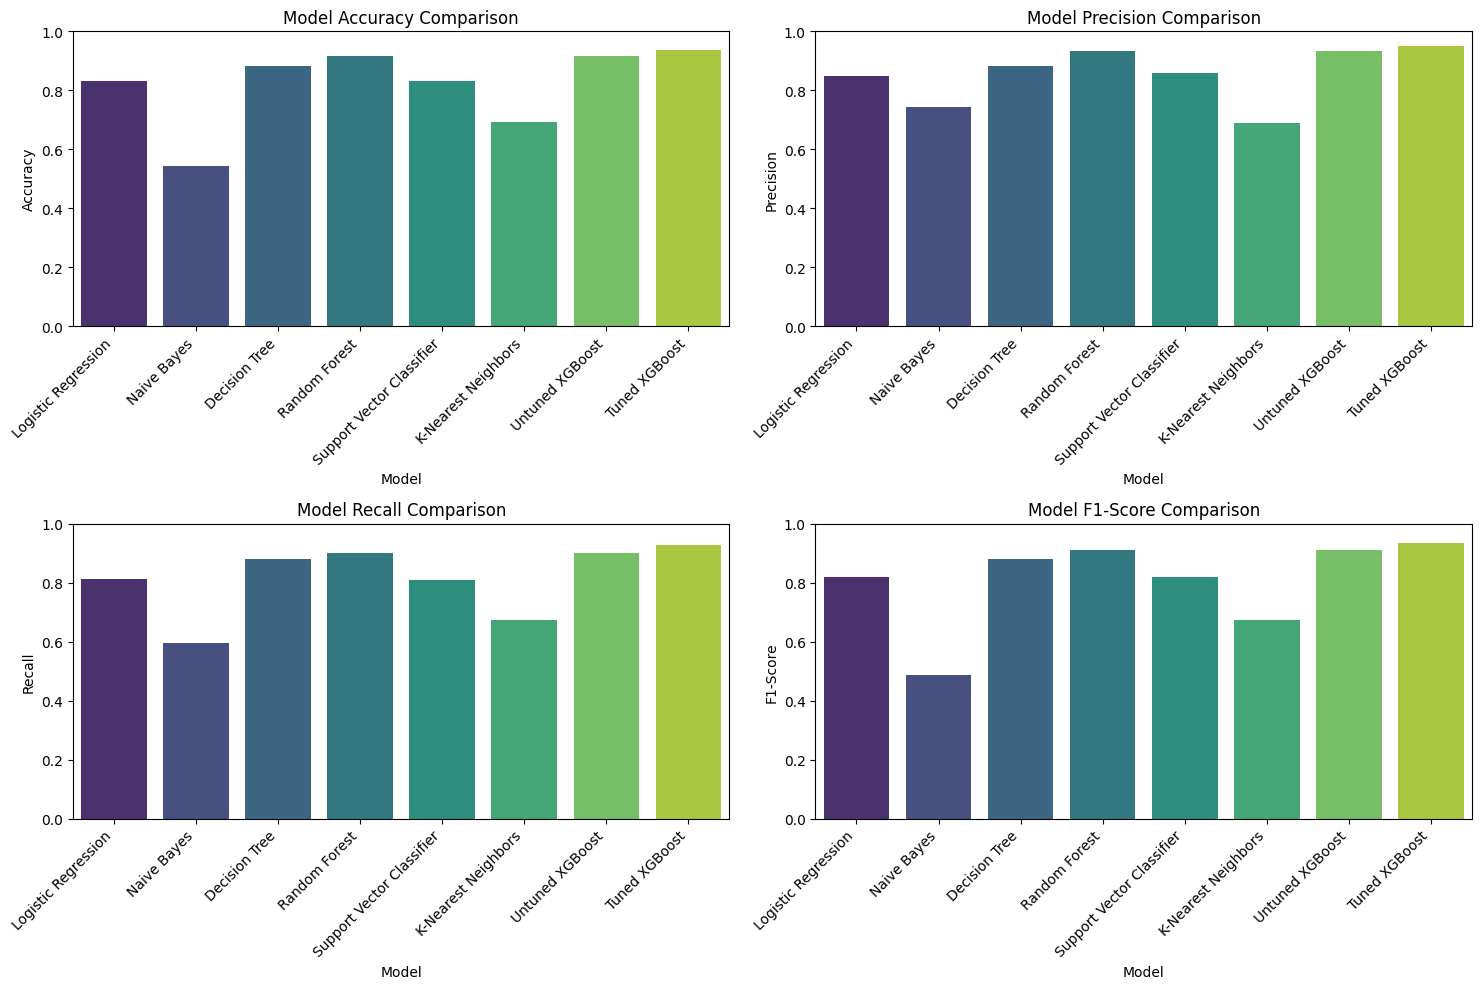

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the performance DataFrame
display(performance_df)

# Display the bar charts for comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x='Model', y=metric, data=performance_df, palette='viridis', hue='Model', legend=False)
    plt.title(f'Model {metric} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1) # Set y-axis limit for metrics between 0 and 1
plt.tight_layout()
plt.show()



Classification Report - Tuned XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        53
           1       1.00      0.85      0.92        41

    accuracy                           0.94        94
   macro avg       0.95      0.93      0.93        94
weighted avg       0.94      0.94      0.94        94



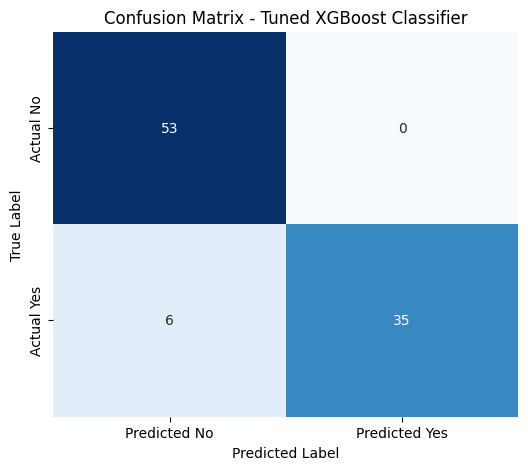

Confusion matrix for Tuned XGBoost Classifier displayed.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_tuned_xgb = xgb_tuned.predict(X_test)

print("\nClassification Report - Tuned XGBoost Classifier:")
print(classification_report(y_test, y_pred_tuned_xgb))

cm_tuned_xgb = confusion_matrix(y_test, y_pred_tuned_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Tuned XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion matrix for Tuned XGBoost Classifier displayed.")